In [1]:
# importing 
import numpy as np
import tensorflow as tf


In [2]:
#disabling stuff
tf.compat.v1.disable_eager_execution()

In [3]:
np.random.seed(101)
tf.random.set_seed(101)

In [4]:
# CREATING SOME RANDOM DATA
ran_a = np.random.uniform(0,100,(5,5))

In [5]:
ran_a

array([[51.63986277, 57.06675869,  2.84742265, 17.15216562, 68.52769817],
       [83.38968626, 30.69662197, 89.36130797, 72.15438618, 18.99389542],
       [55.42275911, 35.2131954 , 18.18924027, 78.56017619, 96.54832224],
       [23.23536618,  8.35614337, 60.35484223, 72.89927573, 27.62388285],
       [68.53063288, 51.78674742,  4.84845374, 13.78692376, 18.69674261]])

In [6]:
ran_b= np.random.uniform(0,100,(5,1))

In [7]:
ran_b

array([[99.43179012],
       [52.06653967],
       [57.87895355],
       [73.48190583],
       [54.19617722]])

In [8]:
#lets create some placeholders hear

In [9]:
a = tf.compat.v1.placeholder(tf.float32)

In [10]:
b = tf.compat.v1.placeholder(tf.float32)

In [11]:
#now lets see some addition. and multiplication here


In [12]:
add_op = a +b 

In [13]:
mult_op = a*b

In [14]:
sess = tf.compat.v1.Session()

In [15]:
add_result = sess.run(add_op , feed_dict={a:ran_a,b:ran_b})

In [16]:
add_result

array([[151.07166 , 156.49855 , 102.27921 , 116.58396 , 167.95949 ],
       [135.45622 ,  82.76316 , 141.42784 , 124.22093 ,  71.06043 ],
       [113.30171 ,  93.09215 ,  76.06819 , 136.43912 , 154.42728 ],
       [ 96.71727 ,  81.83804 , 133.83675 , 146.38118 , 101.10579 ],
       [122.72681 , 105.982925,  59.044632,  67.9831  ,  72.89292 ]],
      dtype=float32)

In [17]:
mult_resut = sess.run(mult_op,feed_dict={a:ran_a,b:ran_b})

In [18]:
mult_resut

array([[5134.644  , 5674.25   ,  283.12433, 1705.4707 , 6813.8315 ],
       [4341.8125 , 1598.267  , 4652.734  , 3756.8293 ,  988.94635],
       [3207.8113 , 2038.1029 , 1052.7742 , 4546.9805 , 5588.1157 ],
       [1707.379  ,  614.02527, 4434.989  , 5356.7773 , 2029.8555 ],
       [3714.0984 , 2806.6438 ,  262.76764,  747.19855, 1013.292  ]],
      dtype=float32)

# Example Neural Network

In [19]:
#this are for features and neurons
n_features = 10
n_dense_neurons = 3

In [20]:
# now creating a placeholders
x =tf.compat.v1.placeholder(tf.float32,shape=(None,n_features))

In [21]:
#creating a variable
W = tf.Variable(initial_value=tf.random.normal([n_features,n_dense_neurons]))

b=tf.Variable(tf.ones([n_dense_neurons]))

In [22]:
# now mulitiplication betwn tgess twi things
xW = tf.matmul(x,W)

In [23]:
#this is similar to y= mx+ c
z = tf.add(xW,b)

In [24]:
# now we have to activate the function
a = tf.sigmoid(z)

In [25]:
#global variables
init= tf.compat.v1.global_variables_initializer()

In [26]:
sess = tf.compat.v1.Session()
#initialzing the global variable|

sess.run(init)

In [27]:
layer_out = sess.run(a, feed_dict={x:np.random.random([1,n_features])})

In [28]:
layer_out

array([[0.19592889, 0.8423014 , 0.36188066]], dtype=float32)

# Simple Regression Example

In [29]:
#after linspace we add  random variables becoz to add noise
x_data  = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [30]:
x_data

array([-1.20856056, -0.08034641,  2.82674411,  4.50477294,  3.42312535,
        4.88227319,  7.18414126,  6.77068715,  9.4930023 ,  9.96290567])

In [31]:
y_label  = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

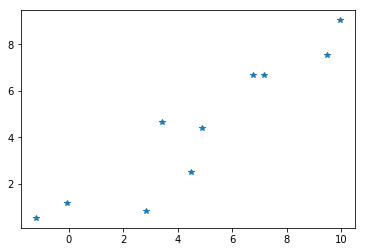

In [33]:
# noisy plot with a linear trend
plt.plot(x_data,y_label,'*')

y = mx+b

In [34]:
np.random.rand(2)

array([0.44236813, 0.87758732])

In [35]:
m = tf.Variable(0.81)
b = tf.Variable(0.67)

In [36]:
#Let's create a cost function

In [37]:
error = 0

for x,y in zip(x_data,y_label):
    #y_hat my predictied value
    
    y_hat = m*x + b
    
    error += (y-y_hat)**2 
    

In [38]:
# we want to reduce the error so we use optimizer to reduce the error
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate= 0.001)


In [39]:
train = optimizer.minimize(error)

In [40]:
init = tf.compat.v1.global_variables_initializer()

In [41]:
sess.run(init)

In [42]:
training_steps  =100

for i in range(training_steps):
    
    sess.run(train)
    
final_slope , final_intercept = sess.run([m,b])

In [43]:
x_test = np.linspace(-1,11,10)

#y = mx+b
y_pred_plot = final_slope*x_test + final_intercept

In [44]:
y_pred_plot

array([-0.05596775,  0.97115841,  1.99828456,  3.02541071,  4.05253687,
        5.07966302,  6.10678917,  7.13391533,  8.16104148,  9.18816763])

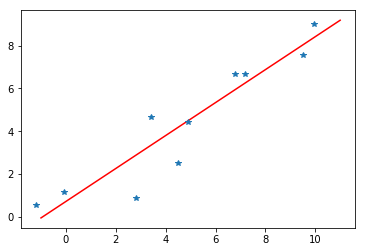

In [45]:
plt.plot(x_test,y_pred_plot,'r')
plt.plot(x_data,y_label,'*')